# Interpolation - Continued

Which is the optimal choice for the points on which we should perform the interpolation?

Theorem 1: let $f \in C^{n+1}([0,1]), \forall x \in [0,1], \exists \xi$ s.t.

$$(Lf - f)(x) = \frac{1}{(n+1)!}f^{(n+1)}(\xi)\omega(x)$$

$$G(t) = (f(t) - p(t))\omega(x) - (f(x) - p(x))\omega(t)$$

($p$ is the **Lagrange interpolation of f**, $Lf$)

$G$ is a function of $t$ with an $x$ parameter and at most $n+2$ zeros

$$\frac{d^{n+1}}{dt^{n+1}}G(t) = f^{(n+1)}\omega(x) - (f(x) - p(x))(n+1)!$$

For **Rolle's theorem**, since we know there are at least two zeros, we know that there exists **at least one point $\xi$ such that** $g'(\xi) = 0$, with $\xi \in (a,b)$

$\exists \xi \in (a,b)$ such that $| \frac{d^{n+1}}{dt^{n+1}}G | = 0$

Taking the infinity norm of the difference and the function allows us to consider if the interpolation approximates well the function when n is going to infinite.

$$\|Lf - f\|_{L^{\infty}} \leq \frac{1}{(n+1)!} \|\omega\|_{L^{\infty}}\|f^{n+1}\|_{L^{\infty}}$$

**About analitical extension**
Instead of writing $f(x)$ we write $f(z), z \in C, f \in C^{\infty}(O(a,b,R))$

$$O(a,b,R) = {z \in C, s.t. dist(z, S(a,b)) < R)}$$

$$|f^{n+1}(\xi)|\leq \frac{(n+1)!}{R^{n+1}}\|f\|_{L^{\infty}(O(a,b,R))}$$(1.) 

Theorem 1 + (1.) $\|f - Lf\|_{L^{\infty}} \begin{aligned}\leq \|f\|_{L^{\infty}(O(a,b,R))}\frac{\|\omega\|_{L^{\infty}}}{R^{n+1}}\end{aligned}$

Which is the same as saying $\begin{aligned}\leq \|f\|_{L^{\infty}(O(a,b,R))}(\frac{|b -a|}{R})^{n+1}\end{aligned}$

Theorem 2: Let $f$ analytically extendible on an oval $(a,b,R)$ 

$(\frac{|b - a|}{R})^{n+1}$ is the **upper bound for the error between the interpolation and the function**





In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def interpolation(fun, q, x):
    """
    Returns the polynomial interpolation of fun at 
    the points q, evaluated at the points x.

    you can plot this by calling plot(x, interpolation(myfun, q, x))
    """
    N = len(q)
    I = arange(N)
    q_vec = q.reshape((-1,1)) # Reshapes q to be a value vector
    x_vec = x.reshape((-1,1))
    B = q_vec**I
    V = x_vec**I # Contain the basis function evaluated at x - V_{i}(x)
    p = V.dot(inv(B).dot(fun(q))) # Vij dot Bij dot func(xj)
    return p

In [4]:
func = lambda x:1./(1 + x**2)
func = sin

In [5]:
q = linspace(-5, 5, 15)
x = linspace(-5, 5, 1025)
y = interpolation(func, x, q)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in power
  del sys.path[0]


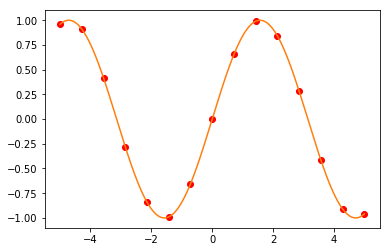

In [6]:
plot(q,y)
plot(q, func(q), 'ro')
plot(x, func(x))

# Triangular Infinite Interpolation Matrix

$L_{x}^{n}f = f(x_{i}^{n})v_{i}^{n}(x)$, with $v_{i}^{n} = \Pi_{i \neq j, j = 0}^{n} \frac{(x - x_{j}^{n})}{x_{i}^{n} - x_{j}^{n}}$

Theorem 3: **(Erodos)** $\forall X,  \exists c $ such that $\|\Lambda\|_{L^{\infty}} \geq \frac{2}{\pi} log(n + 1) - c$

$$\Lambda(x) = \Sigma^{n}_{i=0} |v_{i}^{n}(x)|$$

Lambda represent the **condition number** of the interpolation operation. Taking a perturbation of f will cause a variation in the result of $Lf$ which is proportional to $\Lambda$. This leads us to finding the **upper bound for interpolation**.

$$\|Lf\|_{L^{\infty}} \leq \|\Lambda\|_{L^{\infty}}\|f\|_{L^{\infty}}$$

When $n$ goes to infinity, we see through the Erodos formula that the condition error is also slowly going to infinity. This is a first signal that **interpolation is ill-conditioned**.

Theorem 4: **(Faber)** $\forall X, \exists f$ such that $L_{x}^{n}f \not\to f$

This mean that there is always **at least one function of the interpolation which is not converging to f**.

A function having this property is said to be **adversarial**. It is the case for deep neural networks, where there is always at least one possible permutation of the input where the results are not the ones we expected (example of one pixel attack).

**Chebyshov's points** are defined as $x = argmin\|\Lambda\|_{\infty}$ (defined as **the points that helds the minimum for the Lambda function**), with $x \in R$

Between $[-1, 1]$ the Chebyshov's points are

$$x_{i} = cos(\frac{(2i + 1)\pi}{2n + 2})$$

(There is a scipy function to easily construct those points)

$$\frac{2}{pi}log(n+1) - c \leq \|\Lambda\|_{L^{\infty}} \leq \frac{2}{pi}log(n+1) + 1$$

The first part is obtained from Erodos theorem, the upper bound can be deduced. Long story short, **always use Chebyshov's point for interpolation when possible**.

## Interesting but unnecessary theorem - Weierstrass Approximation Theorem

Let $f \in C([a,b])$, let $\epsilon > 0$, then $\exists n$, and a polynomial of order $n$ with $p \in P^{n} such that

$$\|f - p\|_{L^{\infty}([a,b])} \leq \epsilon$$

So it says, we can build a function **without using interpolation to avoid being bounded by Faber theorem**, such that it converges uniformely to the function f.

$$1^{n} = 1 = ((1-x)+(x))^{n}= \Sigma_{i=0}^{n}\binom{n}{i}x^{i}(1 - x)^{n -i}$$

$\binom{n}{i}x^{i}(1 - x)^{n -i}$ is defined as $N_{i}^{n}(x)$

This value has the following property:

* $N_{i}^{n}(x) \geq 0, \forall x \in [0,1]$


* $\Sigma_{i=0}^{n} N_{i}^{n}(x) = 1, \forall x$


* $N_{i}^{n} \in P^{n}$

$Bf(x) = \Sigma_{i=0}^{n}f(\frac{i}{n})N_{i}^{n}(x) \in P^{n}$

I am splitting the interval in n equispaced points, and the $\max_{x \in [0,1]} N_{i}^{n}(x)$ is achieved at $N_{i}(\frac{i}{n}$)

Increasing n enough make the function converge uniformly, as proved by Weierstrass Theorem.

$B_{n}1 = 1, \forall n \geq 0$

$B_{n}x = x, \forall n \geq 1$

$B_{n}x^{2} = (\frac{n - 1}{n})x^{2} + (\frac{1}{n})x, \forall n \geq 1$

The main difference with Lagrange interpolation is that **increasing the degree of the polynomial will not lead to the identity**, but instead to a polynomial of the same grade having new terms.

The most important property is that $B_{n}f \geq 0, \forall f \geq 0$, which defines B as a **positive operator**. This is different from interpolation, which is an **oscillating operator**, which is bad because the oscillatory behavior is going to increase with the degree of the polynomial (making it more prone to unpredictable behavior).

This is a strong argument for using the Weierstrass operator, since it doesn't oscillate and it just approximates the right function.
